<a href="https://colab.research.google.com/github/LezendarySandwich/CSL7550-Stock-Price-Prediction/blob/master/ARIMA_TATASTEEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt 

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datetime import date

STORAGE = '/content/drive/MyDrive' #@param {type : "string"}
KAGGLE_DIR = 'Kaggle' #@param {type : "string"}
KAGGLE_JSON_PATH = os.path.join(STORAGE, KAGGLE_DIR)
QUANDL_PATH = os.path.join(KAGGLE_JSON_PATH, '.quandl')
__PROJECT = os.path.join(STORAGE, 'Neo')
ML_DATASET = os.path.join(__PROJECT, 'dataset')
START_DATE = date(2014, 1, 1)
END_DATE = date(2019,1,1)
STOCK = 'TATASTEEL'#@param {type : "string"}
SAVE_DIR = os.path.join(ML_DATASET, f'{STOCK}_{START_DATE}_{END_DATE}')
TEST_DS = os.path.join(SAVE_DIR,'dataset_test.csv')
TRAIN_DS = os.path.join(SAVE_DIR,'dataset_train.csv')

In [ ]:
train_df= pd.read_csv(TRAIN_DS,index_col='Date')
test_df= pd.read_csv(TEST_DS,index_col='Date')
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,425.00,426.80,423.65,425.90,1193408.0
2014-01-02,426.00,435.50,417.00,419.20,4000266.0
2014-01-03,416.50,419.40,409.00,412.50,3183770.0
2014-01-06,410.95,415.70,404.60,408.30,2704614.0
2014-01-07,409.90,411.90,392.55,394.70,3900410.0
...,...,...,...,...,...
2017-12-22,716.80,716.80,707.10,711.20,3322839.0
2017-12-26,714.00,725.00,712.00,721.65,6011430.0
2017-12-27,721.75,729.60,717.90,723.45,3611513.0


In [ ]:
df= pd.concat((train_df[['Open','High','Low','Close','Volume']],test_df[['Open','High','Low','Close','Volume']]),axis=0)
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,425.00,426.80,423.65,425.90,1193408.0
2014-01-02,426.00,435.50,417.00,419.20,4000266.0
2014-01-03,416.50,419.40,409.00,412.50,3183770.0
2014-01-06,410.95,415.70,404.60,408.30,2704614.0
2014-01-07,409.90,411.90,392.55,394.70,3900410.0
...,...,...,...,...,...
2018-12-26,509.00,517.30,504.40,513.45,4953741.0
2018-12-27,518.00,519.80,504.95,506.50,5016931.0
2018-12-28,508.20,516.45,508.05,512.85,6307408.0


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 28.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Get best p,d,q value for ARIMA model

from pmdarima import auto_arima 
#Ignore harmless warnings
import warnings
warnings.filterwarnings("always")


#The goal is to minimize the AIC and get the best order with the lowest AIC

stepwise_fit = auto_arima(df['Open'], trace=True, suppress_warnings=True)
stepwise_fit.summary()
stepwise_fit.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9140.983, Time=2.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9150.737, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9152.315, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9152.302, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9148.819, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9155.181, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9155.835, Time=1.00 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9142.041, Time=2.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9142.173, Time=2.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9153.198, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9157.461, Time=1.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9157.329, Time=1.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9144.517, Time=3.11 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=9139.065, Time=0.87 sec
 ARIMA(1,1,2)(0,0,0)[0]          

(2, 1, 2)

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,425.00,426.80,423.65,425.90,1193408.0
2014-01-02,426.00,435.50,417.00,419.20,4000266.0
2014-01-03,416.50,419.40,409.00,412.50,3183770.0
2014-01-06,410.95,415.70,404.60,408.30,2704614.0
2014-01-07,409.90,411.90,392.55,394.70,3900410.0
...,...,...,...,...,...
2018-12-26,509.00,517.30,504.40,513.45,4953741.0
2018-12-27,518.00,519.80,504.95,506.50,5016931.0
2018-12-28,508.20,516.45,508.05,512.85,6307408.0


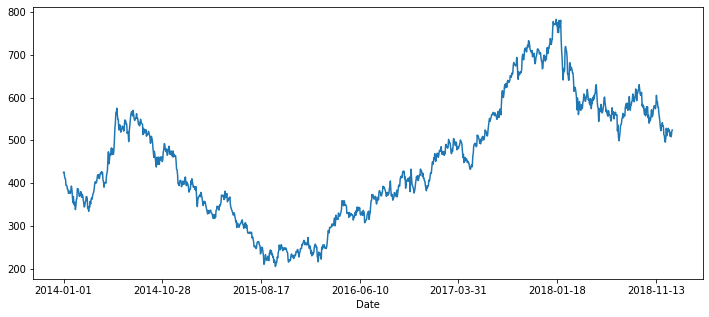

In [ ]:
df['Open'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
pred=[]
for i in range(60):
  train= df.iloc[:-(60-i)]
  model=ARIMA(train['Open'],order=stepwise_fit.order)
  model= model.fit()
  y=model.predict(start=len(train),end=len(train),typ='levels')
  pred.append(y)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated.

In [ ]:
predi=[]
for x in pred: predi.append(x.iloc[0])
predi

[581.0145665297224,
 582.5122256253501,
 575.595346949077,
 569.7652613647786,
 558.2802989034275,
 571.3057425789355,
 560.661703622351,
 558.6974672961503,
 575.452496024355,
 569.5810341234064,
 577.1355437601567,
 561.5609988087839,
 564.8543767337169,
 546.2578809803376,
 548.536118890792,
 548.550865448643,
 545.996485500451,
 554.3476439372859,
 565.8143383768229,
 558.571096936401,
 554.6431588330153,
 560.6395560683628,
 568.8291224119353,
 576.849600377293,
 578.460981627654,
 578.8827779506206,
 574.6470406491183,
 580.4993229954858,
 598.4133336121437,
 591.5752163345607,
 589.0348612215663,
 581.9829180197827,
 577.2600625693733,
 567.8394359234013,
 553.4545907375401,
 546.522142219652,
 531.8744747277448,
 522.1611351157637,
 530.2795948121105,
 535.1567952756179,
 538.6640527302953,
 534.6844784129158,
 532.1241951234431,
 517.8833891022304,
 507.065209495985,
 503.2590513285192,
 491.68461182479973,
 506.08199753705077,
 525.0943199240799,
 509.7285233178339,
 514.2638

In [ ]:
real_stock_price= df.iloc[-60:]['Open'].values
real_stock_price

array([576.75, 580.  , 567.  , 560.  , 573.15, 557.  , 560.8 , 578.25,
       571.1 , 578.05, 553.  , 559.  , 540.  , 552.  , 544.7 , 547.6 ,
       556.5 , 571.25, 554.95, 555.8 , 561.  , 574.  , 579.6 , 581.  ,
       579.35, 573.55, 583.  , 605.  , 590.3 , 590.  , 577.45, 577.  ,
       562.  , 552.  , 544.  , 529.7 , 522.3 , 532.  , 535.  , 541.2 ,
       532.7 , 533.  , 513.25, 510.7 , 499.4 , 495.6 , 506.  , 528.05,
       511.  , 518.  , 523.  , 527.9 , 520.  , 524.15, 518.  , 509.  ,
       518.  , 508.2 , 520.  , 524.  ])

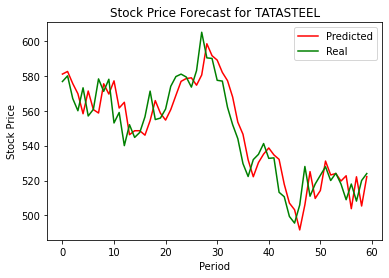

In [ ]:

plt.plot(predi, color="red", label= "Predicted")
plt.plot(real_stock_price, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test=df.iloc[-60:]

import math 

from sklearn.metrics import mean_squared_error 
from math import sqrt 
 
MAE = mean_absolute_error(test['Open'], pred) #65.16489906613461
MSE = mean_squared_error(test['Open'], pred) #4877.095560904092
RMSE = math.sqrt(MSE) #69.83620522983828
R2 = r2_score(test['Open'], pred) #-3.0842872575999865
real_arima_stock_price_mean = test['Open'].mean()


print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R Squared:", R2)
print("Real Stock Price Mean:", real_arima_stock_price_mean)
print("RMSE/REAL_STOCK_PRICE_MEAN:", RMSE/real_arima_stock_price_mean) #0.0938522023072058

Mean Absolute Error: 9.339334520083883
Mean Squared Error: 127.82995906763273
Root Mean Squared Error: 11.306191183048018
R Squared: 0.8248201224442681
Real Stock Price Mean: 547.7716666666668
RMSE/REAL_STOCK_PRICE_MEAN: 0.02064033587543718
